# Heart Disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns

In [2]:
df= pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Now data have duplicate Rows and not have missing values

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [7]:
da2=df['HeartDisease'].value_counts().reset_index(name='count')
da2

,index,count
0,No,274456
1,Yes,27261


In [8]:
data1=df.copy()
le = LabelEncoder()
le.fit(data1['HeartDisease'])
data1['HeartDisease']=le.transform(data1['HeartDisease'])

le.fit(data1['Smoking'])
data1['Smoking']=le.transform(data1['Smoking'])

le.fit(data1['AlcoholDrinking'])
data1['AlcoholDrinking']=le.transform(data1['AlcoholDrinking'])

le.fit(data1['Stroke'])
data1['Stroke']=le.transform(data1['Stroke'])

le.fit(data1['DiffWalking'])
data1['DiffWalking']=le.transform(data1['DiffWalking'])

le.fit(data1['Sex'])
data1['Sex']=le.transform(data1['Sex'])

le.fit(data1['AgeCategory'])
data1['AgeCategory']=le.transform(data1['AgeCategory'])

le.fit(data1['Race'])
data1['Race']=le.transform(data1['Race'])

le.fit(data1['Diabetic'])
data1['Diabetic']=le.transform(data1['Diabetic'])


le.fit(data1['PhysicalActivity'])
data1['PhysicalActivity']=le.transform(data1['PhysicalActivity'])

le.fit(data1['GenHealth'])
data1['GenHealth']=le.transform(data1['GenHealth'])

le.fit(data1['Asthma'])
data1['Asthma']=le.transform(data1['Asthma'])

le.fit(data1['KidneyDisease'])
data1['KidneyDisease']=le.transform(data1['KidneyDisease'])

le.fit(data1['SkinCancer'])
data1['SkinCancer']=le.transform(data1['SkinCancer'])

<Axes: >

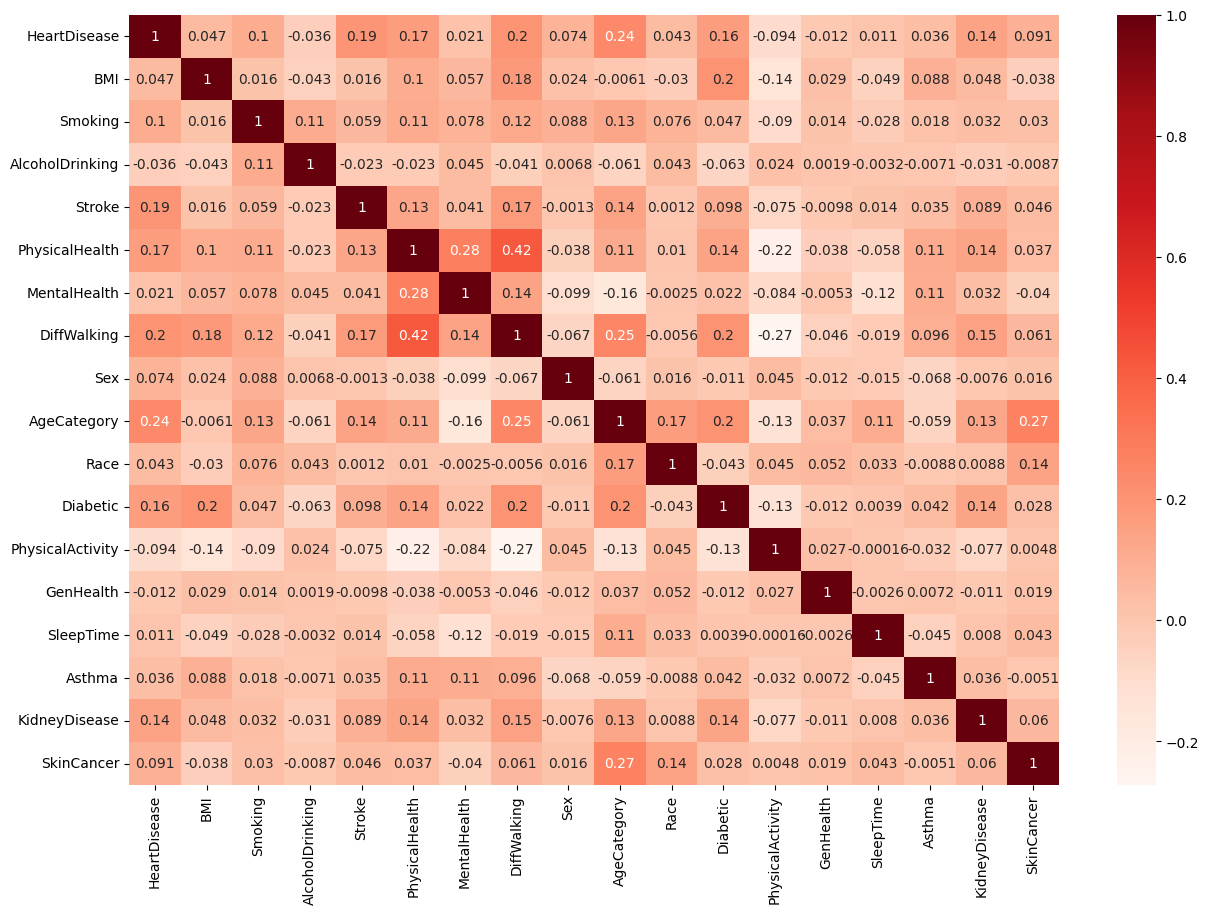

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,cmap='Reds')

## splite

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = data1.drop(["HeartDisease"] , axis = 1).values
y = data1["HeartDisease"].values

In [11]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

## scalar

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [13]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Random Forest Classifier Without Imbalanced Technique

## grid search

In [16]:
# from sklearn.model_selection import GridSearchCV
# #from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5] }
# clf = RandomForestClassifier()
# #clf = DecisionTreeClassifier()
# grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 )
# grid_result = grid.fit(x_train , y_train)

# print(grid_result)
# print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))


In [17]:
from sklearn.ensemble import RandomForestClassifier


dt = RandomForestClassifier(max_depth= 4, max_features=5 )

In [18]:
dt.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5)

In [19]:
y_pred=dt.predict(x_test)

In [20]:
print("Train Score : ",dt.score(x_train,y_train)," Test Score : ",dt.score(x_test,y_test))

Train Score :  0.9097782904011278  Test Score :  0.9100755667506297


In [21]:
accuracy_score(y_test, y_pred)*100

91.00755667506297

# Evaluation for Random Forest Classifier with out Handling Imbalanced Data

In [14]:
from sklearn.metrics import confusion_matrix , classification_report

In [15]:
print (classification_report(y_test , y_pred))

NameError: name 'y_pred' is not defined

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
sm = SMOTE(random_state = 42)
x_smote, y_smote= sm.fit_resample(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)
dt2=RandomForestClassifier()
dt2.fit(x_train2,y_train2)
print("Train Score : ",dt2.score(x_train2,y_train2)," Test Score : ",dt2.score(x_test2,y_test2))
y_pred2=dt2.predict(x_test2)
print("accuracy :" , accuracy_score(y_test2, y_pred2)*100)
print(x_train2.shape,y_train2.shape)
print(x_test2.shape,y_test2.shape)

Train Score :  0.998447838633515  Test Score :  0.9377240796338939
accuracy : 93.7724079633894
(411684, 17) (411684,)
(137228, 17) (137228,)


In [ ]:
print (classification_report(y_test2 , y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68436
           1       0.96      0.91      0.94     68792

    accuracy                           0.94    137228
   macro avg       0.94      0.94      0.94    137228
weighted avg       0.94      0.94      0.94    137228

